In [1]:
import random
from __future__ import division
import math
from matplotlib import pyplot as plt
from collections import Counter

def random_kid():
    return random.choice(["boy","girl"])

both_girls=0
older_girl=0
either_girl=0

random.seed(0)
for _ in range(10000):
    younger=random_kid()
    older=random_kid()
    if older =="girl":
        older_girl+=1
    if older =="girl" and younger =="girl":
        both_girls+=1
    if older =="girl" or younger =="girl":
        either_girl+=1
print "P(both | older):",both_girls/older_girl
print "P(both | either:)", both_girls/either_girl


P(both | older): 0.514228456914
P(both | either:) 0.341541328364


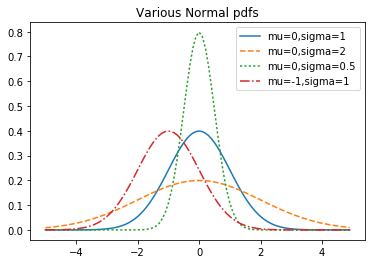

In [2]:
def uniform_cdf(x):
    if x<0: return 0
    elif x<1: return x
    else: return 1


def normal_pdf(x,mu=0,sigma=1):
    sqrt_two_pi=math.sqrt(2*math.pi)
    return (math.exp(-(x-mu)**2/2/sigma**2)/(sqrt_two_pi*sigma))

xs=[x/10.0 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')

plt.legend()
plt.title("Various Normal pdfs")
plt.show()

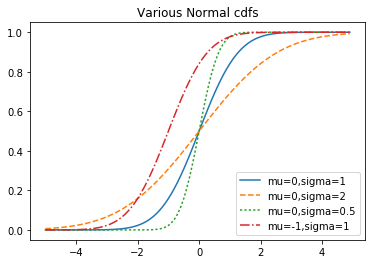

In [3]:
def normal_cdf(x,mu=0,sigma=1):
    return(1+math.erf((x-mu)/math.sqrt(2)/sigma))/2

xs=[x/10.0 for x in range(-50,50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')

plt.legend(loc=4)
plt.title("Various Normal cdfs")
plt.show()

In [4]:
def inverse_normal_cdf(p,mu=0,sigma=1,tolerance=0.00001):
    if mu !=0 or sigma !=1:
        return mu+sigma*inverse_normal_cdf(p,tolerance=tolerance)
    low_z,low_p=-10.0,0
    hi_z,hi_p=10.0,1
    while hi_z-low_z>tolerance:
        mid_z=(low_z+hi_z)/2
        mid_p=normal_cdf(mid_z)
        if mid_p<p:
            low_z,low_p=mid_z,mid_p
        elif mid_p>p:
            hi_z,hi_p=mid_z,mid_p
        else:
            break
    return mid_z

#二分搜尋法

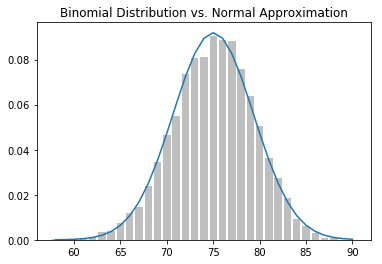

In [5]:
def bernoulli_trial(p):
    return 1 if random.random()<p else 0

def binomial(n,p):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p,n,num_points):
    data=[binomial(n,p) for _ in range(num_points)]
    
    histogram=Counter(data)
    plt.bar([x for x in histogram.keys()],[v/num_points for v in histogram.values()],0.8,color='0.75')
    
    mu=p*n
    sigma=math.sqrt(n*p*(1-p))
    
    xs=range(min(data),max(data)+1)
    ys=[normal_cdf(i+0.5,mu,sigma)-normal_cdf(i-0.5,mu,sigma) for i in xs]
    
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

make_hist(0.75,100,10000)

In [6]:

def normal_approximation_to_binomial(n,p):
    mu=p*n
    sigma=math.sqrt(p*(1-p)*n)
    return mu,sigma

normal_probability_below=normal_cdf


def normal_probability_above(lo,mu=0,sigma=1):
    return 1-normal_cdf(lo,mu,sigma)

def normal_probability_between(lo,hi,mu=0,sigma=1):
    return normal_cdf(hi,mu,sigma)-normal_cdf(lo,mu,sigma)

def normal_probability_outside(lo,hi,mu=0,sigma=1):
    return 1-normal_probability_between(lo,hi,mu,sigma)


def normal_upper_bound(probability,mu=0,sigma=1):
    return inverse_normal_cdf(probability,mu,sigma)

def normal_lower_bound(probability,mu=0,sigma=1):
    return inverse_normal_cdf(1-probability,mu,sigma)

def normal_two_sided_bounds(probability,mu=0,sigma=1):
    tail_probability=(1-probability)/2
    
    upper_bound=normal_lower_bound(tail_probability,mu,sigma)
    lower_bound=normal_upper_bound(tail_probability,mu,sigma)
    
    return lower_bound,upper_bound


mu_0,sigma_0 = normal_approximation_to_binomial(1000,0.5)

normal_two_sided_bounds(0.95,mu_0,sigma_0)


#power

lo,hi=normal_two_sided_bounds(0.95,mu_0,sigma_0)

mu_1,sigma_1=normal_approximation_to_binomial(1000,0.55)

type_2_probability=normal_probability_between(lo,hi,mu_1,sigma_1)
power=1-type_2_probability

In [7]:
def two_sided_p_value(x,mu=0,sigma=1):
    if x>=mu:
        return 2*normal_probability_above(x,mu,sigma)
    else:
        return 2*normal_probability_below(x,mu,sigma)

print two_sided_p_value(529.5,mu_0,sigma_0)




extreme_value_count=0
for _ in range(100000):
    num_heads=sum(1 if random.random()<0.5 else 0 for _ in range(1000))
    
    if num_heads>=530 or num_heads<=470:
        extreme_value_count+=1

print extreme_value_count/100000

print two_sided_p_value(531.5,mu_0,sigma_0)

0.062077215796
0.06153
0.0463452878378


In [8]:
#confidence interval

#math.sqrt(p*(1-p)/1000)

p_hat=525/1000

mu=p_hat
sigma=math.sqrt(p_hat*(1-p_hat)/1000)

print normal_two_sided_bounds(0.95,mu,sigma)

(0.4940490278129096, 0.5559509721870904)


In [9]:
def estimated_parameters(N,n):
    p=n/N
    sigma=math.sqrt(p*(1-p)*n)
    return p,sigma

def a_b_test_statistic(N_A,n_A,N_B,n_B):
    p_A,sigma_A=estimated_parameters(N_A,n_A)
    p_B,sigma_B=estimated_parameters(N_B,n_B)
    return (p_B-p_A)/math.sqrt(sigma_A**2+sigma_B**2)

z=a_b_test_statistic(1000,200,1000,180)
print z

two_sided_p_value(z)

z=a_b_test_statistic(1000,200,1000,150)
print z

two_sided_p_value(z)

-0.00261336336512
-0.00699283601275


0.9944205695813676

In [10]:
#baysien

def B(alpha,beta):
    return math.gamma(alpha)*math.gamma(beta) / math.gamma(alpha+beta)

def beta_pdf(x,alpha,beta):
    if x<0 or x>1:
        return 0
    return x** (alpha-1)*(1-x)**(beta-1)/B(alpha,beta)

#????
beta_pdf(0.5,2,2)

1.5

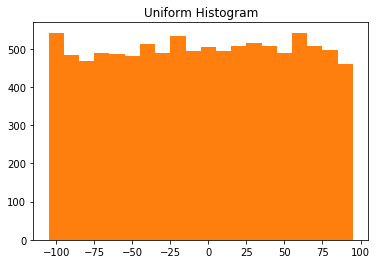

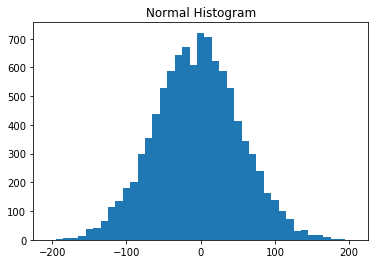

In [12]:
##chapter 10

def bucketize(point,bucket_size):
    return bucket_size*math.floor(point/bucket_size)

def make_histogram(points,bucket_size):
    return Counter(bucketize(point,bucket_size) for point in points)

def plot_histogram(points,bucket_size,title=""):
    histogram=make_histogram(points,bucket_size)
    plt.bar(histogram.keys(),histogram.values(),width=bucket_size)
    plt.title(title)
    plt.show()

random.seed(0)

uniform=[200*random.random()-100 for _ in range(10000)]
normal=[57*inverse_normal_cdf(random.random()) for _ in range(10000)]

plot_histogram(uniform,10,"Uniform Histogram")
plot_histogram(normal,10,"Normal Histogram")

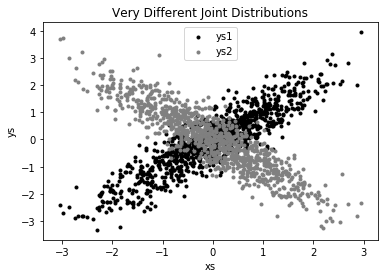

0.896564353422
-0.894703903832


In [30]:
import numpy


def random_normal():
    return inverse_normal_cdf(random.random())

xs=[random_normal() for _ in range(1000)]
ys1=[x+random_normal()/2 for x in xs]
ys2=[-x+random_normal()/2 for x in xs]

plt.scatter(xs,ys1,marker='.',color='black',label='ys1')
plt.scatter(xs,ys2,marker='.',color='gray',label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

print numpy.corrcoef(xs,ys1)[0][1]
print numpy.corrcoef(xs,ys2)[0][1]

In [33]:
def shape(A):
    num_rows=len(A)
    num_colus=len(A[0]) if A else 0
    return num_rows,num_cols

def correlation_matrix(data):
    
    _, num_columns= shape(data)
    
    def matrix_entry(i,j):
        return numpy.corrcoef(get_column(dta,i),get_column(data,j))[0][1]
    return make_matrix(num_columns,num_columns,matrix_entry)


import matplotlib.pyplot as plt

_,num_columns = shape(data)
fig, ax =plt.subplots(num_columns,num_columns)

for i in range(num_columns):
    for j in range(num_columns):
        
        if i !=j:ax[i][j].scatter(get_column(data,j), get_column(data,i))
        
        else: ax[i][j].annotate("series"+str(i),(0.5,0.5),xycoords='axis fraction',
                               ha="center",va="center")
        
        if i<num_columns-1: ax[i][j].xaxis.set_visible(False)
        if j>0: ax[i][j].yaxis.set_visible(False)
            
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()

NameError: name 'data' is not defined

In [ ]:
# clear data

closing_price=float(row[2])

def parse_row(input_row,parsers):
    return [parser(value) if parser is not None else value
           for value,parser in zip(input_row,parsers)]

def parse_rows.with(reader,parsers):
    for row in reader:
        yield parse_row(row,parsers)
        
def try_or_none(f):
    def f_or_none(x):
        try: return f(x)
        except: return None
    return f_or_none

#new parse_now
def parse_now(input_row,parsers):
    return [try_or_none(parser)(value) if parser is not None else value
           for value,parser in zip(input_row,parsers)]


#單一步驟讀取資料
#
#資料範例
# 6/20/2014,AAPL,90.91
# 6/20/2014,MSFT,41.68
# 6/20/2014,FB,64.5
# 6/19/2914,AAPL,91.68
# 6/19/2014,MSFT,n/a
# 6/19/2014,FB,64.34

import dateutil.parser
data=[]

with open("comma_delimited_stock_prices.csv","rb") as f:
    reader=csv.reader(f)
    for line in parse_rows_with(reader,[dateutil.parser.parse,None,float]):
        data.append(line)

#
def try_parse_field(field_name,value,parser_dict):
    #從parser_dict取得合適的函式解析數值
    parser=parser_dict.get(field_name)
    if parser is not None:
        return try_or_none(parser)(value)
    else:
        return value

def parse_dict(input_dict,parser_dict):
    return {field_name: try_parse_field(field_name,value,parser_dict)
           for field_name,value in input_dict.iteritems()}

In [ ]:
data=[
    {'closing_price':102.06,
    'date': datetime.datetime(2014,8,29,0,0),
    'symbol': 'AAPL'},
    #...
]

#想知道AAPL有史以來最高的股價
max_aapl_price=max(row["closing_price"] for row in data if row["symbol"] =="AAPL")


by_symbol=defaultdict(list)
for row in data:
    by_symbol[row["symbol"]].append(row)
    
max_price_by_symbol= {symbol:max(row["closing_price"] for row in grouped_rows)
                     for symbol,grouped_rows in by_symbol.iteritems()}


def picker(field_name):
    return lambda row: row[filed_name]

def pluck(filed_name,rows):
    return map(picker(field_name),rows)

def group_by(grouper,rows,value_transform=None):
    grouped=defaultdict(list)
    for row in rows:
        grouped[grouper(row)].append(row)
        
    if value_transform is None:
        return grouped
    else:
        return {key: value_transform(rows) for key,rows in grouped.iteritems()}

#new max_price_by_symbol
max_price_by_symbol = gorup_by(picker("symbol"),
                              data,lambda rows: max(pluck("closing_price",rows)))



#變動百分比最大最小值

def percent_price_change(yesterdy,today):
    return today["closing_price"] / yesterday["cloisng_price"] -1

def day_over_day_changes(grouped_rows):
    ordered = sorted(grouped_rows,key=picker("date"))
    
    return [{"symbol" : today["symbol"],
            "date": today["date"],
            "change": percent_price_change(yesterday,today)
            for yesterday,today in zip(ordered,ordered[1:])}]


changes_by_symbol=group_by(picker("symbol"), data,day_over_day_changes)
all_changes=[change
            for changes in changes_by_symbol.values()
            for change in changes]

max(all_changes,key=picker("change"))

In [ ]:
# dimension reduction

def scale(data_matrix):
    num_rows,num_cols=shape(data_matrix)
    means=[mean(get_column(data_matrix,j))
          for j in range(num_cols)]
    stdevs=[standard_deviation(get_column(data_matrix,j))
           for j in range(num_cols)]
    return means,stdevs

def rescale(data_matrix):
    means,stdevs=scale(data_matrx)
    
    def rescaled(i,j):
        if stdevs[j]>0:
            return (data_matrix[i][j] - means[j])/stdevs[j]
        else:
            return data_matrix[i][j]
        
    num_rows,num_cols = shape(data_matrix)
    return make_matrix(num_rows,num_cols,rescaled)


#PCA

def de_mean_matrix(A):
    nr,nc=shape(A)
    columnn_means,_=scale(A)
    return make_matrix(nr,nc,lambda i,j: A[i][j]-column_means[j])

def direction(w):
    mag=magnitude(w)
    return [w_i/mag for w_i in w]

def directional_variance_i(x_i,w):
    return dot(x_i,direction(w))**2

def directional_variance(X,w):
    return sum(directional_variance_i(x_i,w)
              for x_i in X)



def directional_variance_gradient_i(x_i,w):
    projection_length = dot(x_i,direction(w))
    return [2*projection_length*x_ij for x_ij in x_i]

def directional_variance_gradient(X,w):
    return vector_sum(directional_variance_gradient_i(x_i,w)
                     for x_i in X)


def first_pricipal_component(X):
    guess=[1 for _ in X[0]]
    unscaled_maximizer=maximize_batch(
        partial(directional_variance,X),
        partial(directional_variance_gradient,X),
        guess)
    return direction(unscaled_maximizer)


def project(v,w):
    projection_length=dot(v,w)
    return scalar_multiply(projection_length,w)


def remove_projection_from_vector(v,w):
    return vector_subtract(v,project(v,w))

def remove_projection(X,w):
    return [remove_projection_from_vector(x_i,w) for x_i in X]


#PCA
def principal_component_analysis(X,num_components):
    components=[]
    for _ in range(num_components):
        component=first_principal_component(X)
        components.append(component)
        X=remove_projection(X,component)
        
    return components

##
##直接用投影的方式求 資料和某個向量的最大值
##此向量即為第一主成分
##